# Data Exploration

Instacart has published it's 2017 order data, located here https://www.instacart.com/datasets/grocery-shopping-2017. This dataset has been used for a Kaggle competition.

**NOTE**: I start with Kaggle and found that another Kaggle user has explored this data. Refer to this link: https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart

It gives a nice overview of what the data looks like. This is important to understand how I should organize my collaborative filtering code. For example, how large is each department? Each aisle? This is also used for creating an efficient way to store my data.

In [1]:
import pandas as pd
#pip install pandas-profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

orders = pd.read_csv('data/orders.csv')
products = pd.read_csv('data/products.csv')
departments = pd.read_csv('data/departments.csv')
aisles = pd.read_csv('data/aisles.csv')
orders.head(3) #to test

#traindata = orders[orders['eval_set'] == 'train']

order_products_train = pd.read_csv("data/order_products__train.csv")
order_products_prior = pd.read_csv("data/order_products__prior.csv")

In [2]:
train = pd.read_csv('data/order_products__train.csv')
train.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


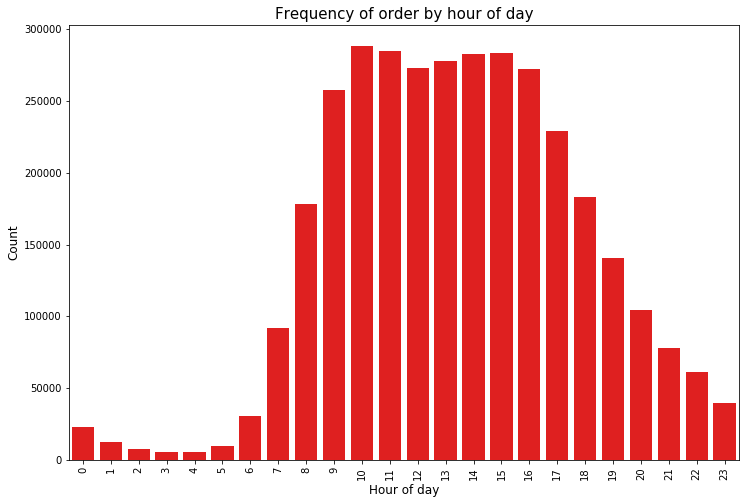

In [3]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders, color='red')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

In [4]:
#count_ProductsPerAisle = compiled.groupby(['aisle', 'product_id']).size().groupby('aisle').sum()
#count_ProductsPerAisle
#count_ProductsPerAisle.sort_values('aisle', ascending=False)
#count_ProductsPerAisle.nlargest(10)

#UserAisle['aisle'].nunique()

#### KEEP ####
#grouped = ProductAisle.groupby(['aisle']).count()
#sort = grouped.sort_values(['product_id'], ascending=False)
#sort


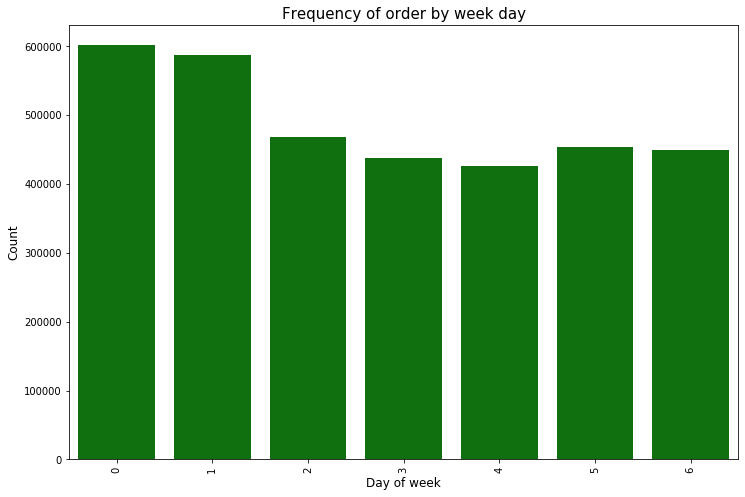

In [5]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders, color='green')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

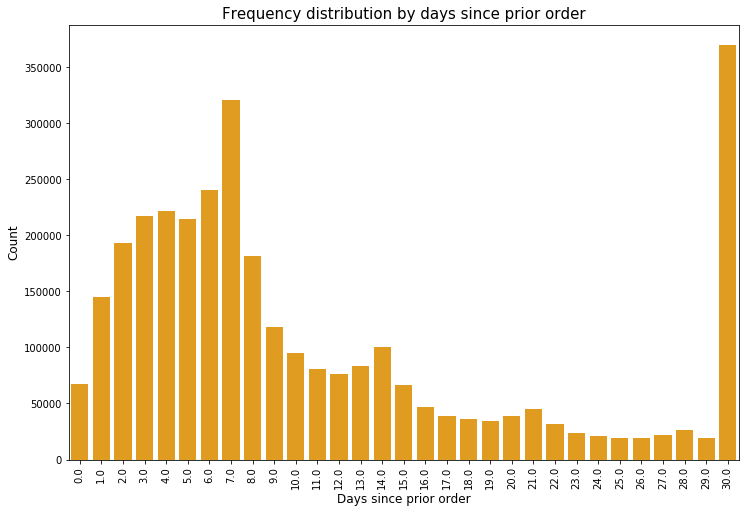

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, color='orange')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [7]:
order_products_prior = pd.merge(order_products_prior, products, on='product_id', how='left')
order_products_prior = pd.merge(order_products_prior, aisles, on='aisle_id', how='left')
order_products_prior = pd.merge(order_products_prior, departments, on='department_id', how='left')
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


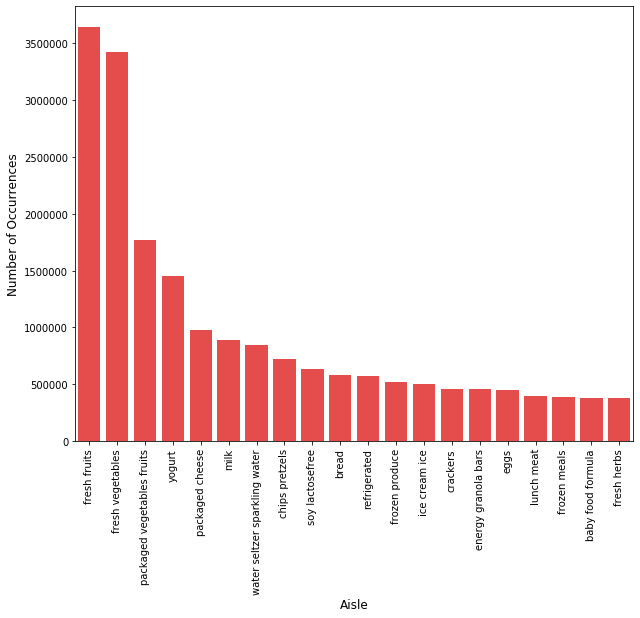

In [8]:
cnt_srs = order_products_prior['aisle'].value_counts().head(20)
plt.figure(figsize=(10,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='red')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

---------------------------------------------------------------------------

# <span style="color:blue">Let's look at the most frequently reordered items below</span>

In [9]:
cnt_srs = order_products_prior['product_name'].value_counts().reset_index().head(10)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


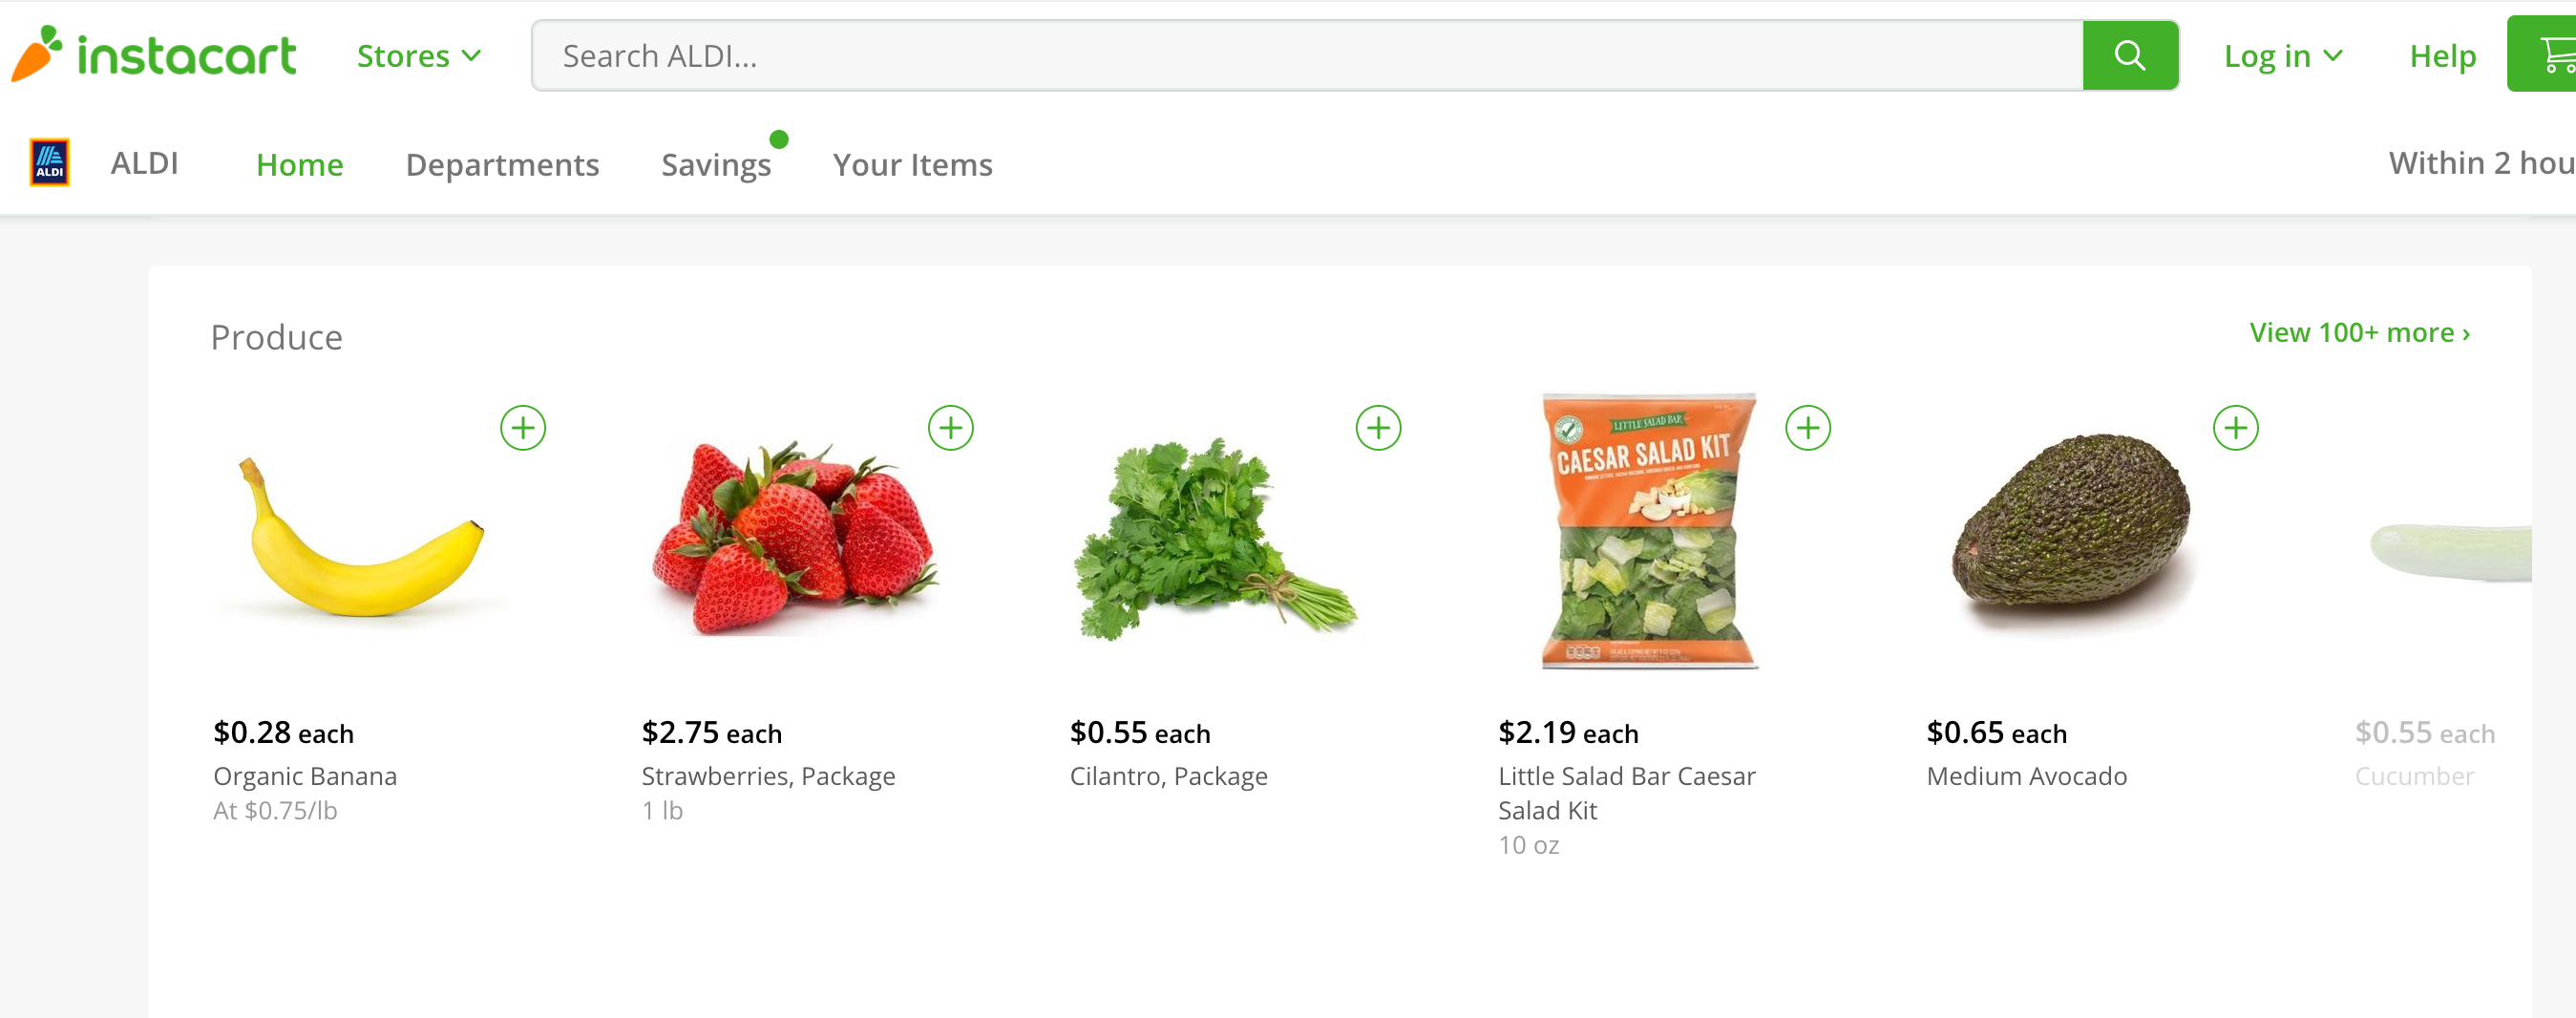

In [10]:
from IPython.display import Image
Image(filename="picture1.png", width = 800, height = 800)

#### <span style="color:blue">There is a data-driven reason as to why Instacart's homepage displays bananas, stawberries, and avocados under it's produce section. As we see in the table above, these items are part of the 10 top items that customers reorder.</span>

---------------------------------------------------------------------------

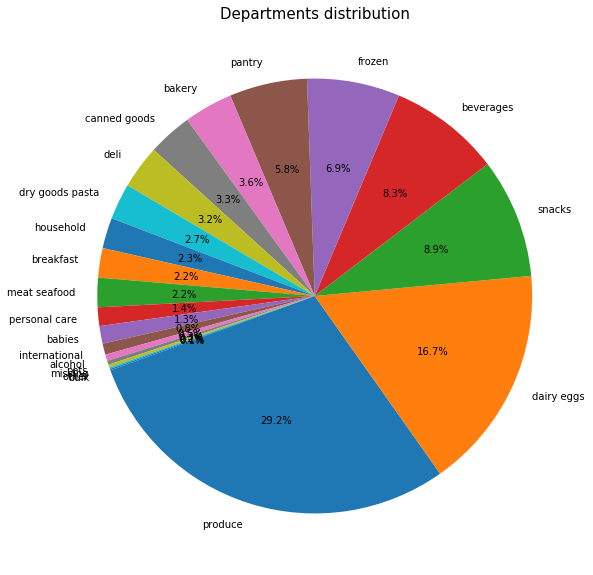

In [11]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

In [12]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


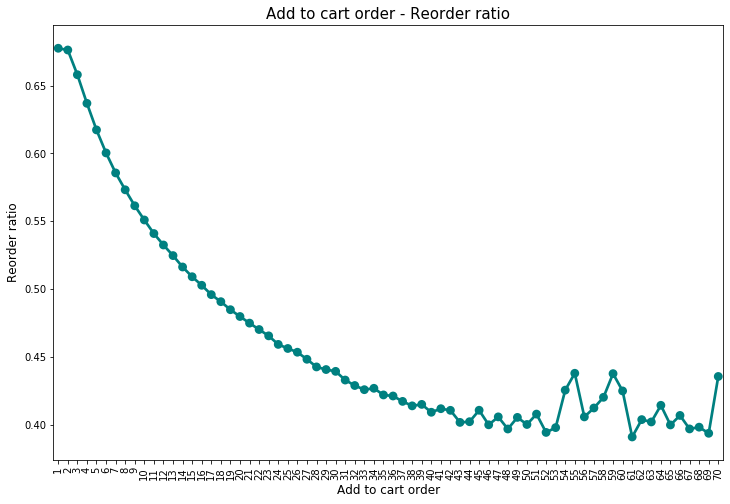

In [17]:
order_products_prior["add_to_cart_order_mod"] = order_products_prior["add_to_cart_order"].copy()
order_products_prior["add_to_cart_order_mod"].loc[order_products_prior["add_to_cart_order_mod"]>70] = 70
grouped = order_products_prior.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped['add_to_cart_order_mod'].values, grouped['reordered'].values, alpha=0.8, color="teal")
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [14]:
grouped = order_products_prior.groupby(["department"])["reordered", "add_to_cart_order"].aggregate("mean").reset_index()
grouped.head()

,department,reordered,add_to_cart_order
0,alcohol,0.569924,5.428346
1,babies,0.578971,10.575925
2,bakery,0.628141,8.084397
3,beverages,0.653460,6.976699
4,breakfast,0.560922,9.124044


**Next**

1) item based collaborative filtering – research.

2) Ways to build this based on purchase history

3) K-folds

4) Train test split